In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.html.widgets import *

:0: FutureWarning: IPython widgets are experimental and may change in the future.


#Importing the data

In [1]:
run transform_dataset5.py

Parse complete.
Loading the data set...
Education column updated as 'Education'
Month Of Death column updated as 'Month_of_Death'
Day of Week Of Death column updated as 'DOW_of_Death'
Sex column updated as 'Sex'
Age column name change
Age group column name change
Marital Status column name change
Place_Of_Death column name change
Race column name change

Dataset is available as df_suicide_clean;
Dictionary list of all columns definition is available in dictionary_list;
To see the order in which dictinary are stored, see dictionary_list_names
To use, chose dictionary, ditionary keys are the various values of the column.


In [2]:
df_suicide_clean.head()

,Resident_Status,Education,Month_Of_Death,DOW_of_Death,Sex,Age,Age_Groups,Marital_Status,Place_Of_Death,Race
0,1,99,2,5,0,41,6,3,4,1
1,4,99,2,1,0,49,7,2,7,1
2,2,99,2,4,0,61,8,2,1,1
3,1,99,2,7,0,41,6,1,4,1
4,1,99,2,7,0,26,5,1,4,1


In [19]:
index_to_drop = df_suicide_clean[(df_suicide_clean['Age']==999)].index.tolist()
df_suicide_clean.drop(index_to_drop, inplace=True)

/Users/AnnaVMS/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [61]:
df_suicide_clean.drop('Education',axis=1, inplace=True)

/Users/AnnaVMS/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


#Exploring the data

In [62]:
list_columns = df_suicide_clean.columns

###general tendencies for the whole population

In [57]:
def hist_plot(column_name, bin_num):
    print '%d values: '%len(df_suicide_clean[column_name].unique()), df_suicide_clean[column_name].unique()
    plt.hist(df_suicide_clean[column_name].values, bins = bin_num)
    plt.xlabel(str(column_name))

8 values:  [4 7 1 2 5 6 3 9]


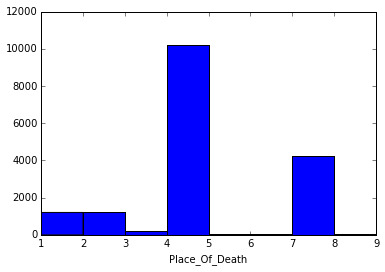

In [63]:
interact(hist_plot, column_name = list(list_columns), bin_num = (1,12))

####trends
- Age: a peak around 30 and 50
- Sex: males are more likely to commit suicide
- Race: in absolute values, whites have the largest count
- Place of Death: most usually at home
- Month/Week: no clear trend

###general tendencies for the whole population

In [50]:
def man_women_differences(column_name, race, bin_num):
    print '%d values: '%len(df_suicide_clean[column_name].unique()), df_suicide_clean[column_name].unique()
    if race ==0:
        mask_f = (df_suicide_clean['Sex']==1)
        mask_m = (df_suicide_clean['Sex']==0)
    else:
        mask_f = (df_suicide_clean['Sex']==1) & (df_suicide_clean['Race']==race)
        mask_m = (df_suicide_clean['Sex']==0) & (df_suicide_clean['Race']==race)
    df_suicide_clean[mask_f][column_name].hist(label='female', bins=bin_num)
    df_suicide_clean[mask_m][column_name].hist(alpha=0.4, label='male', bins=bin_num)
    plt.xlabel(str(column_name))
    plt.ylabel('Count')
    plt.legend()

93 values:  [41 49 61 26 18 57 45 32 20 77 48 24 36 63 70 16 37 58 56 42 51 79 65 69 54
 22 29 52 14 34 81 46 31 12 38 25 39 76 19 47 40 35 82 28 53 17 30 68 66 27
 62 64 72 60 67  9 33 84 43 50 88 23 59 55 44 71 75 73 74 92 21 83 80 87 86
 93 78 85 15 91 13 90 89 95 10 97  6 94 11 96 99 98  8]


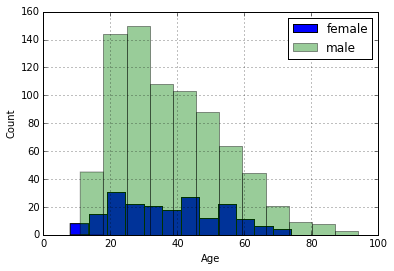

In [51]:
interact(man_women_differences, column_name = list(list_columns), bin_num = (1,12), race=(0,2))

In [30]:
df_suicide_clean.Race.unique()

array([ 1,  2, 48, 68,  3,  4, 28, 78, 18,  6,  5,  7, 38, 58])

In [41]:
def race_differences(race, column_name, bin_num):
    print '%d values: '%len(df_suicide_clean[column_name].unique()), df_suicide_clean[column_name].unique()
    mask_race = (df_suicide_clean['Race']==race)
    print 'there are %d people concerned'%sum(df_suicide_clean['Race']==race)
    df_suicide_clean[mask_race][column_name].hist(bins=bin_num)
    plt.xlabel(str(column_name))
    plt.ylabel('Count')
    plt.legend()

93 values:  [41 49 61 26 18 57 45 32 20 77 48 24 36 63 70 16 37 58 56 42 51 79 65 69 54
 22 29 52 14 34 81 46 31 12 38 25 39 76 19 47 40 35 82 28 53 17 30 68 66 27
 62 64 72 60 67  9 33 84 43 50 88 23 59 55 44 71 75 73 74 92 21 83 80 87 86
 93 78 85 15 91 13 90 89 95 10 97  6 94 11 96 99 98  8]
there are 15655 people concerned


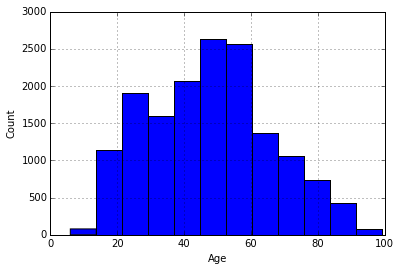

In [42]:
interact(race_differences, column_name = list(list_columns), bin_num = (1,12), race=(1,7))

In [48]:
def marital_status(column_name, bin_num):
    print '%d values: '%len(df_suicide_clean[column_name].unique()), df_suicide_clean[column_name].unique()
    mask_S = (df_suicide_clean['Marital_Status']==1)
    mask_M = (df_suicide_clean['Marital_Status']==2)
    print 'there are %d people concerned'%(sum(mask_S)+sum(mask_M))
    df_suicide_clean[mask_S][column_name].hist(label='Single', bins=bin_num)
    df_suicide_clean[mask_M][column_name].hist(label='Married', alpha = 0.2, bins=bin_num)
    plt.xlabel(str(column_name))
    plt.ylabel('Count')
    plt.legend()

93 values:  [41 49 61 26 18 57 45 32 20 77 48 24 36 63 70 16 37 58 56 42 51 79 65 69 54
 22 29 52 14 34 81 46 31 12 38 25 39 76 19 47 40 35 82 28 53 17 30 68 66 27
 62 64 72 60 67  9 33 84 43 50 88 23 59 55 44 71 75 73 74 92 21 83 80 87 86
 93 78 85 15 91 13 90 89 95 10 97  6 94 11 96 99 98  8]
there are 12141 people concerned


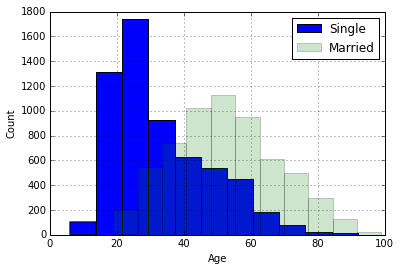

In [49]:
interact(marital_status, column_name = list(list_columns), bin_num = (1,12))